In [113]:
# Import required libraries
import pandas as pd
import numpy as np
from pandas.plotting import lag_plot
from pandas.plotting import autocorrelation_plot
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
import math as math
from scipy.stats import boxcox
from random import randrange
from random import seed
from random import random
from random import gauss
import os
from scipy import signal

from scipy import fftpack


In [149]:
def plot_fft(x_in, filename=None):
    f = 50
    f_s = 1/f
    X = fftpack.fft(x_in)
    freqs = fftpack.fftfreq(len(x_in)) * f_s
    f, (ax0, ax1) = plt.subplots(2, 1)

    ax0.plot(x_in)
    ax0.set_ylim(0.0, 1.1)

    ax1.plot(fftpack.fftfreq(len(x_in)), np.abs(X))
    ax1.set_ylim(0, 10);
    if filename is not None:
        plt.savefig(filename)

#fig, ax = pl
def plot_stft(X, nperseg=256, title='', filename=None):
    f, t, Zxx = signal.stft(X, fs=1/50, nperseg=nperseg)
    amp = f.max()*10
    plt.pcolormesh(t, f, np.abs(Zxx), vmin=0, vmax=amp, shading='gouraud')
    plt.title(title)
    plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [sec]')
    #plt.plot(f.max()*df['gps_speed(m/s)']/df['gps_speed(m/s)'].max())
    if filename is not None:
        plt.savefig(filename)
    plt.show()


def plot_spectrogram(x_in, filename=None):
    freqs, times, spectrogram = signal.spectrogram(x_in, fs=1/50, window='hann')

    plt.figure(figsize=(5, 4))
    plt.imshow(spectrogram, aspect='auto', cmap='hot_r', origin='lower')
    plt.title('Spectrogram')
    plt.ylabel('Frequency band')
    plt.xlabel('Time window')
    plt.tight_layout()
    if filename is not None:
        plt.savefig(filename)
    
def plot_density(x_in, title='', filename=None):
    freqs, psd = signal.welch(x_in, fs=50, )
    plt.figure(figsize=(5, 4))
    plt.semilogx(freqs, psd)
    plt.title('PSD: power spectral density - ' + title)
    plt.xlabel('Frequency')
    plt.ylabel('Power')
    plt.tight_layout()
    if filename is not None:
        plt.savefig(filename)
        
        
def plot_ts(x_in, title='', filename=None):
    plt.figure(figsize=(15, 10))
    x_in.plot()
    plt.title(title)
    if filename is not None:
        plt.savefig(filename)

In [14]:
def load_y_data(y_path):
    y = np.loadtxt(y_path, dtype=np.int32).reshape(-1,1)
    # change labels range from 1-6 t 0-5, this enables a sparse_categorical_crossentropy loss function
    return y - 1

def load_X_data(X_path):
    X_signal_paths = [X_path + file for file in os.listdir(X_path)]
    print(X_signal_paths)
    X_signals = [np.loadtxt(path, dtype=np.float32) for path in X_signal_paths]
    return np.transpose(np.array(X_signals), (1, 2, 0))

PATH = './HAPT Data Set/RawData/acc_exp01_user01.txt'
LABEL_NAMES = ["Walking", "Walking upstairs", "Walking downstairs", "Sitting", "Standing", "Laying"]

# load X data
X_train = load_X_data(PATH + 'train/Inertial Signals/')
X_test = load_X_data(PATH + 'test/Inertial Signals/')
# load y label
y_train = load_y_data(PATH + 'train/y_train.txt')
y_test = load_y_data(PATH + 'test/y_test.txt')

print("useful information:")
print(f"shapes (n_samples, n_steps, n_signals) of X_train: {X_train.shape} and X_test: {X_test.shape}")
X_all = np.concatenate([X_train, X_test])
print(f"all X's have following mean: {format(X_all.mean(), '.2f')} and standard derivation: {format(X_all.std(), '.2f')} ")


['./UCI_HAR_Dataset/train/Inertial Signals/body_gyro_z_train.txt', './UCI_HAR_Dataset/train/Inertial Signals/body_acc_y_train.txt', './UCI_HAR_Dataset/train/Inertial Signals/total_acc_z_train.txt', './UCI_HAR_Dataset/train/Inertial Signals/body_acc_x_train.txt', './UCI_HAR_Dataset/train/Inertial Signals/body_gyro_x_train.txt', './UCI_HAR_Dataset/train/Inertial Signals/total_acc_y_train.txt', './UCI_HAR_Dataset/train/Inertial Signals/body_gyro_y_train.txt', './UCI_HAR_Dataset/train/Inertial Signals/total_acc_x_train.txt', './UCI_HAR_Dataset/train/Inertial Signals/body_acc_z_train.txt']
['./UCI_HAR_Dataset/test/Inertial Signals/total_acc_y_test.txt', './UCI_HAR_Dataset/test/Inertial Signals/total_acc_x_test.txt', './UCI_HAR_Dataset/test/Inertial Signals/body_acc_x_test.txt', './UCI_HAR_Dataset/test/Inertial Signals/body_acc_y_test.txt', './UCI_HAR_Dataset/test/Inertial Signals/body_gyro_y_test.txt', './UCI_HAR_Dataset/test/Inertial Signals/body_gyro_x_test.txt', './UCI_HAR_Dataset/test/I

In [115]:
# upstairs 1 1 2 15712 16377
# downstairs 14869 15492
# walking  1 1 7496 8078
df = pd.read_csv('./HAPT Data Set/RawData/gyro_exp01_user01.txt', delim_whitespace=True, header=None)
df_do = df.iloc[14869: 15492].copy()
df_up = df.iloc[15712: 16377].copy()
df_w = df.iloc[7496: 8078].copy()
print(df.head())

          0         1         2
0 -0.054978 -0.069639 -0.030849
1 -0.012523  0.019242 -0.038485
2 -0.023518  0.276417  0.006414
3 -0.093462  0.367741  0.001222
4 -0.124311  0.476780 -0.022907

[5 rows x 3 columns]


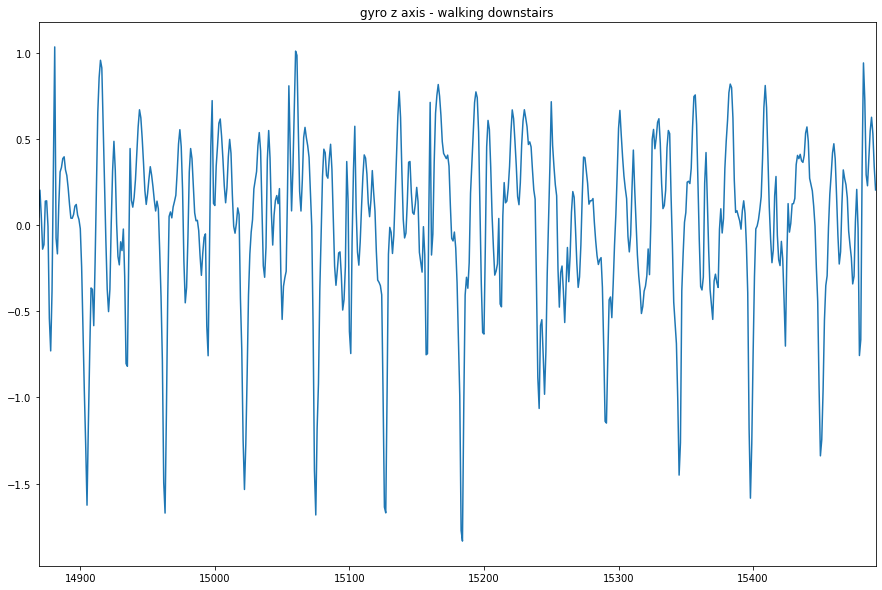

In [128]:
plot_ts(df_do[2], title='gyro z axis - walking downstairs', filename='gyro_ts_walk_do.png')

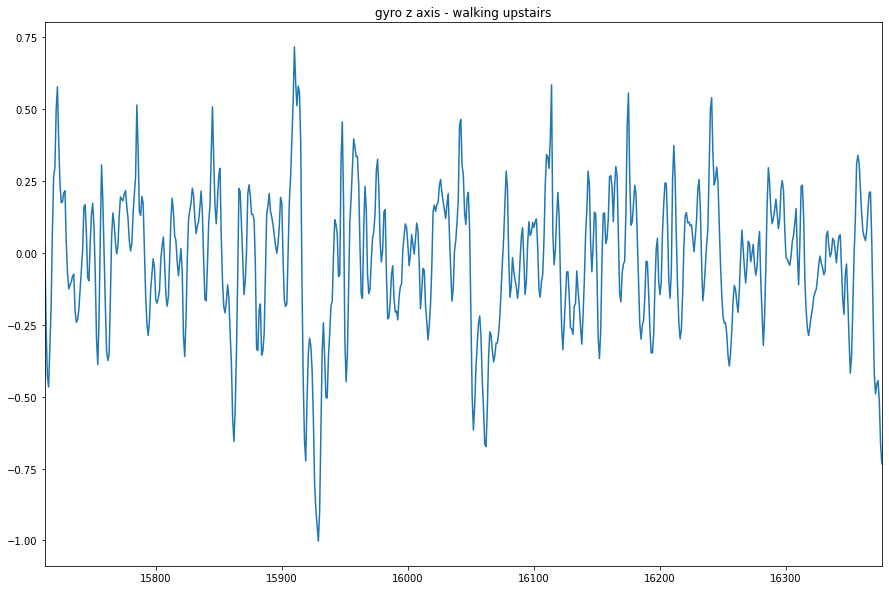

In [129]:
plot_ts(df_up[2], title='gyro z axis - walking upstairs', filename='gyro_ts_walk_up.png')

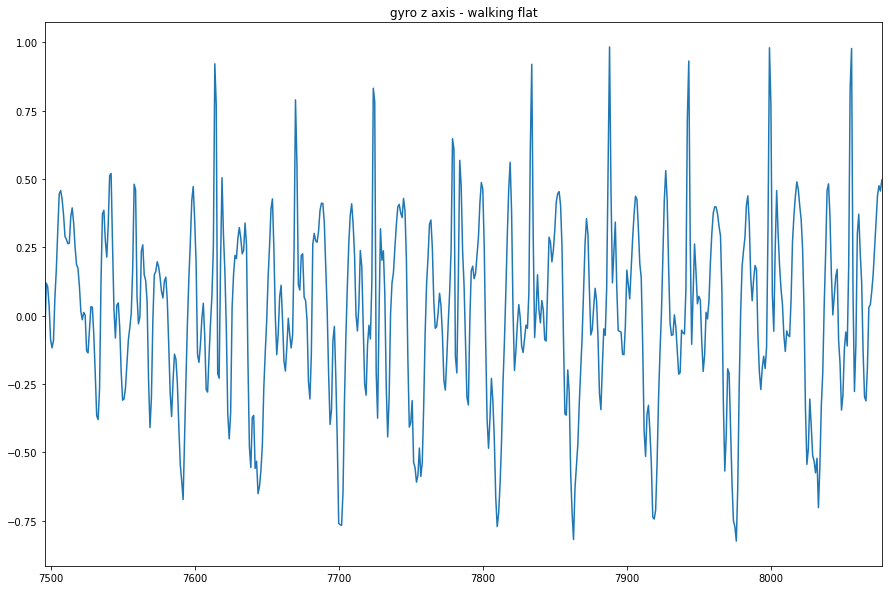

In [130]:
plot_ts(df_w[2], title='gyro z axis - walking flat', filename='gyro_ts_walk.png')

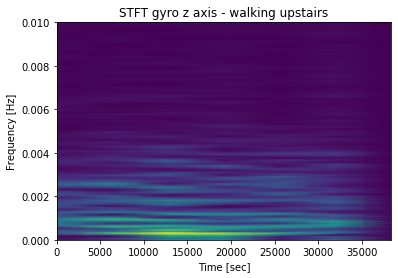

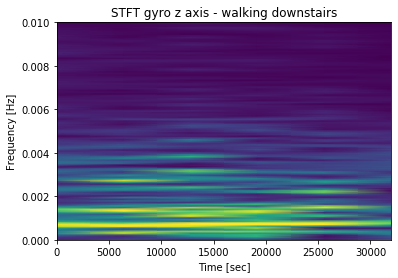

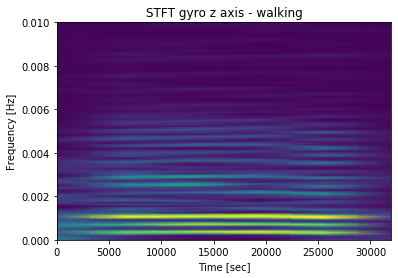

In [137]:
plot_stft(df_up[2], title='STFT gyro z axis - walking upstairs', filename='stft_walking_upstairs.png')
plot_stft(df_do[2], title='STFT gyro z axis - walking downstairs', filename='stft_walking_downstairs.png')
plot_stft(df_w[2], title='STFT gyro z axis - walking', filename='stft_walking.png')

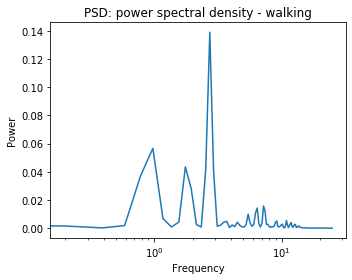

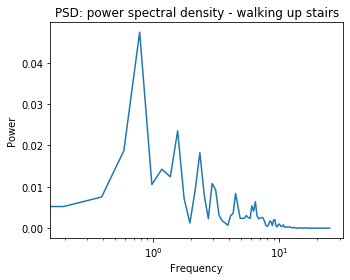

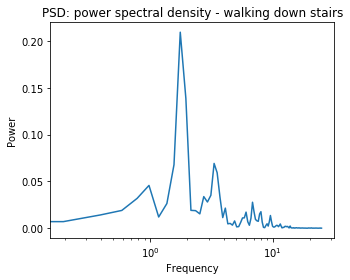

In [151]:
plot_density(df_w[2], title='walking', filename='psd_walking.png')
plot_density(df_up[2], title='walking up stairs', filename='psd_walking_upstairs.png')
plot_density(df_do[2], title='walking down stairs', filename='psd_walking_downstairs.png')

"\n\nax.stem(freqs, np.abs(X))\nax.set_xlabel('Frequency in Hertz [Hz]')\nax.set_ylabel('Frequency Domain (Spectrum) Magnitude')\nax.set_xlim(-f_s / 2, f_s / 2)\nax.set_ylim(-5, 110)"

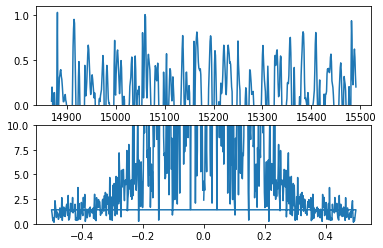

In [46]:
freqs

array([ 0.00000000e+00,  1.16856559e-06,  2.33713117e-06, ...,
       -3.50569676e-06, -2.33713117e-06, -1.16856559e-06])

In [58]:
X

array([31187.88300756   -0.j        ,  2314.31054139+3167.66252298j,
       -1304.22869699+2254.00088232j, ...,   510.64968921-1513.08473008j,
       -1304.22869699-2254.00088232j,  2314.31054139-3167.66252298j])

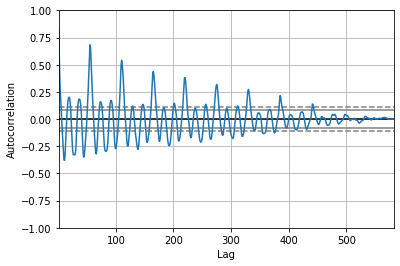

In [142]:
autocorrelation_plot(df_w[2])

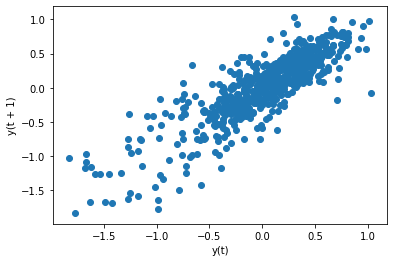

In [141]:
lag_plot(df_do[2])

In [56]:
!wc -l /Users/tim26/Downloads/HAPT\ Data\ Set/RawData/gyro_exp01_user01.txt

   20598 /Users/tim26/Downloads/HAPT Data Set/RawData/gyro_exp01_user01.txt


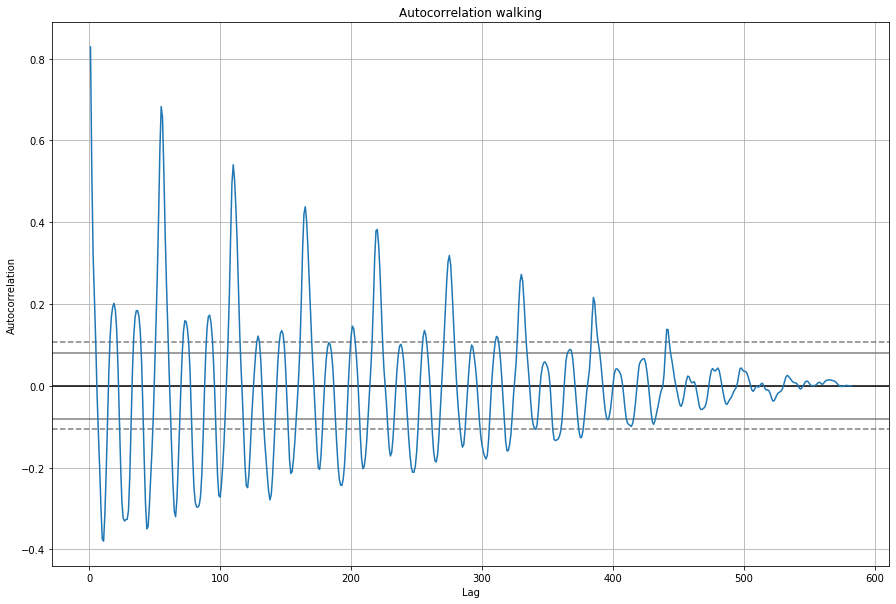

In [148]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
ax.set_title('Autocorrelation walking')
autocorrelation_plot(df_w[2], ax=ax)
plt.savefig('autocorrelation_walking.png')
plt.show()

In [ ]:
from skimage import io
image = io.imread('images/moonlanding.png')
M, N = image.shape

f, ax = plt.subplots(figsize=(4.8, 4.8))
ax.imshow(image)

print((M, N), image.dtype)